# Microsoft wants to make a Big Film


## Overview
This project focus on analyzing certain factor such as revenue,genres,rating et for making a successful movie .It helps in finding the type of movies that people like to watch.Microsoft team could use these analyses for their new beginging in the film industry.It would help them in creating a successful film.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies.I have made analysis to find the type of movie to make in order to be successfull. 

## Data Understanding:

In [1]:
# import all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
title = pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
rating = pd.read_csv('zippeddata/imdb.title.ratings.csv.gz')
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


Now we need to load the needed csv data files for the movie analysis from the folder named "zippeddata folder"

In [2]:
# use pandas to load the csv file and store it as dataframe
title = pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
rating = pd.read_csv('zippeddata/imdb.title.ratings.csv.gz')
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### Budget Data:

The budegt data has 'foreign gross','production_budget' and 'worldwide_gross' in type integer.We need to convert it into a float and the 'release_date is in object.It has to be converted to datetime object.Before that let us check for any unnecessary characters.

In [6]:
budget['production_budget']

0       $425,000,000
1       $410,600,000
2       $350,000,000
3       $330,600,000
4       $317,000,000
            ...     
5777          $7,000
5778          $6,000
5779          $5,000
5780          $1,400
5781          $1,100
Name: production_budget, Length: 5782, dtype: object

In [7]:
# Remove separator using replace function
budget['production_budget'].str.replace(',','')

0       $425000000
1       $410600000
2       $350000000
3       $330600000
4       $317000000
           ...    
5777         $7000
5778         $6000
5779         $5000
5780         $1400
5781         $1100
Name: production_budget, Length: 5782, dtype: object

In [8]:
# Remove the $ symbol using split fuction
budget['production_budget'].str.replace(',','').str.split('$')

0       [, 425000000]
1       [, 410600000]
2       [, 350000000]
3       [, 330600000]
4       [, 317000000]
            ...      
5777         [, 7000]
5778         [, 6000]
5779         [, 5000]
5780         [, 1400]
5781         [, 1100]
Name: production_budget, Length: 5782, dtype: object

In [9]:
# Select the needed value by using lambda function
budget['production_budget'].str.replace(',','').str.split('$').map(lambda x:x[1])

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [10]:
# store the result 
budget['production_budget']=budget['production_budget'].str.replace(',','').str.split('$').map(lambda x:x[1])

In [11]:
# Check for the float values
budget['production_budget'].str.contains('.').sum()

5782

In [12]:
# convert to float
budget['production_budget']=budget['production_budget'].astype(float)

In [13]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


Same is repeated for 'domestic_gross' and 'worldwide_gross'

In [14]:
budget['domestic_gross']=budget['domestic_gross'].str.replace(',','').str.split('$').map(lambda x:x[1])

In [15]:
budget['domestic_gross']=budget['domestic_gross'].astype(float)

In [17]:
budget['worldwide_gross'].str.replace(',','').str.split('$').map(lambda x:x[1])

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [18]:
budget['worldwide_gross']=budget['worldwide_gross'].str.replace(',','').str.split('$').map(lambda x:x[1])

In [19]:
budget['worldwide_gross']=budget['worldwide_gross'].astype(float)

In [20]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [21]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [22]:
# convert 'release_date' to datetime object.
budget['release_date']=pd.to_datetime(budget['release_date'])

In [23]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [24]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [25]:
# reset the index to datetime format to geth the month and year in separate column.
budget.index = pd.to_datetime(budget.index)

In [26]:
# create 'month' column
budget['month'] = budget['release_date'].dt.month

In [27]:
# craete 'year'column
budget['year'] = budget['release_date'].dt.year

In [28]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
1970-01-01 00:00:00.000000000,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009
1970-01-01 00:00:00.000000001,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011
1970-01-01 00:00:00.000000002,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019
1970-01-01 00:00:00.000000003,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015
1970-01-01 00:00:00.000000004,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017


In [37]:
# budget['month'] = pd.to_datetime(budget['month'], format='%m').dt.month_name().str.slice(stop=3)

In [38]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
1970-01-01 00:00:00.000000000,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009
1970-01-01 00:00:00.000000001,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011
1970-01-01 00:00:00.000000002,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019
1970-01-01 00:00:00.000000003,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015
1970-01-01 00:00:00.000000004,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017


In [39]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
month                5782 non-null int64
year                 5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 406.5+ KB


### Data Cleaning:

We need to clean the data before performing analysis . I checked for the null values and dropped unnecessary columns to get better output.

In [40]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Columns 'runtime_minutes','original_title' and 'runtime_minutes' contains null values.

In [41]:
# checking for the sum of null values
title['runtime_minutes'].isna().sum()

31739

In [42]:
# checking for the average number of null vales
title['runtime_minutes'].isna().sum()/len(title)

0.21717620976571053

My analysis is based on genre and runtime. I can't keep null values as it hinders my analysis.Hence dropping it.

In [43]:
# title['runtime_minutes']=title['runtime_minutes'].fillna(0)
title.dropna(subset=['runtime_minutes'],axis=0,inplace=True)

In [44]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
tconst             114405 non-null object
primary_title      114405 non-null object
original_title     114401 non-null object
start_year         114405 non-null int64
runtime_minutes    114405 non-null float64
genres             112233 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [45]:
title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [46]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
tconst             114405 non-null object
primary_title      114405 non-null object
original_title     114401 non-null object
start_year         114405 non-null int64
runtime_minutes    114405 non-null float64
genres             112233 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [47]:
# checking for the null values in 'genre' column
title['genres'].isna().sum()

2172

In [48]:
title['genres'].isna().sum()/len(title)

0.01898518421397666

In [49]:
# since it has few null values,I am dropping the rows .
title.dropna(subset=['genres'],axis=0,inplace=True)

In [50]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 6 columns):
tconst             112233 non-null object
primary_title      112233 non-null object
original_title     112232 non-null object
start_year         112233 non-null int64
runtime_minutes    112233 non-null float64
genres             112233 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


### Dataset Merging :

Before merging the data,We need to check for the duplicates.

In [51]:
title[title.duplicated(subset=['primary_title'],keep=False)].sort_values(by='primary_title').iloc[20:30]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
34872,tt2289132,1915,1915,2013,5.0,"Documentary,Drama"
14385,tt1714820,1960,1960,2010,75.0,Documentary
55595,tt3255186,1960,1960,2013,66.0,"Biography,Documentary"
110755,tt6461678,1971,1971,2011,215.0,Documentary
60011,tt3478510,1971,1971,2014,79.0,"Documentary,History,Thriller"
38738,tt2388621,1982,1982,2013,90.0,Drama
97230,tt5671400,1982,1982,2015,11.0,Documentary
101489,tt5932546,1985,1985,2016,114.0,"Adventure,Comedy,Drama"
109086,tt6411590,1985,1985,2018,85.0,Drama
65431,tt3735338,1989,1989,2014,54.0,Documentary


There are movies with same title released on diffrent years.

In [52]:
# checking for the title with year column
title[title.duplicated(subset=['primary_title','start_year'],keep=False)].sort_values(by='primary_title').iloc[20:30]


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
105408,tt6160528,88,88,2016,103.0,Documentary
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
31052,tt2180277,90 Minutes,90 minutter,2012,88.0,Drama
51474,tt3054786,90 Minutes,90 Minutes,2012,94.0,Thriller
105960,tt6200522,A Ballad of Maladies,A Ballad of Maladies,2016,86.0,"Documentary,History,Music"
104657,tt6119224,A Ballad of Maladies,A Ballad of Maladies,2016,86.0,"Documentary,Music"
9344,tt1554091,A Better Life,A Better Life,2011,98.0,"Drama,Romance"
25786,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama
142558,tt9387380,A Christmas Carol,A Christmas Carol,2018,121.0,"Drama,Family,Musical"


There are movies having same name and release year but different runtime.

In [53]:
title[title.duplicated(subset=['primary_title','start_year','runtime_minutes'],keep=False)].sort_values(by='primary_title')



,tconst,primary_title,original_title,start_year,runtime_minutes,genres
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
...,...,...,...,...,...,...
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


In [54]:
# removing duplicates having same title,year and runtime
title.drop_duplicates(subset=['primary_title','start_year','runtime_minutes'],inplace=True)

In [55]:
# checking for duplicates in 'gross' dataframe
# gross.duplicated().any()

In [56]:
# gross[gross.duplicated(subset='title',keep=False)]

In [57]:
# checking for merging conflict between 'title' and 'gross' dataframe.
title[title['primary_title']=='Abduction']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10471,tt1600195,Abduction,Abduction,2011,106.0,"Action,Mystery,Thriller"
40541,tt2447982,Abduction,Abduction,2011,84.0,"Horror,Thriller"
101693,tt5943940,Abduction,Abduction,2017,90.0,"Action,Comedy,Drama"
128101,tt7867360,Abduction,Abduction,2019,106.0,"Action,Sci-Fi"


In [58]:
# gross[gross['title']=='Abduction']

From the above checks,title having same title released on same year having different runtime.Chances are possible for the movie to be released in different language in the same year. But the gross data have only one title with the same year. If we join on 'title',it will fill the movie with same name and year with the same gross value.Hence I am deleting the duplicates.

In [59]:
#drop duplicates
title.drop_duplicates(subset=['primary_title','start_year'],inplace=True)

The dataframe 'title' and 'rating' as a unique id 'tconst'.I am merging the two dataframe on 'tconst' using inner joint.If I use left or outer join then it would give me null values in genres as 'rating' dataframe has no genres columns. 

In [60]:
# Merging the dataframe and assigning it to the variable 'df'
df=title.merge(rating,on='tconst',how='inner')

In [61]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 65124
Data columns (total 8 columns):
tconst             65125 non-null object
primary_title      65125 non-null object
original_title     65125 non-null object
start_year         65125 non-null int64
runtime_minutes    65125 non-null float64
genres             65125 non-null object
averagerating      65125 non-null float64
numvotes           65125 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Now I would like to merge the dataframe 'df' with 'gross'.They share the common column name 'title' in common. Hence checking for any duplicates beforing merging the dataframe using

In [63]:
# renaming the column name of 'df' dataframe to match with 'gross' dataframe for merging 
df.rename(columns={'primary_title':'movie','start_year':'year'},inplace=True)

In [64]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
month                5782 non-null int64
year                 5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 406.5+ KB


In [65]:
# merging 'df' and 'gross' using left joint on 'title' and 'year' columns
# movie_analysis_df= pd.merge(df, gross, on=['title','year'],how='left')
movie_analysis_df= pd.merge(df, budget, on=['movie','year'],how='left')

In [66]:
movie_analysis_df[movie_analysis_df.duplicated(subset=['movie'],keep=False)].sort_values(by='movie').iloc[50:100]

,tconst,movie,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month
15522,tt2094752,A Girl Like Her,A Girl Like Her,2012,48.0,Documentary,7.9,11,NaN,NaT,NaN,NaN,NaN,NaN
23470,tt2523832,A Girl Like Her,A Girl Like Her,2015,91.0,Drama,7.1,6369,NaN,NaT,NaN,NaN,NaN,NaN
57559,tt7036332,A Hole in the Head,Dziura w glowie,2018,91.0,Drama,8.2,48,NaN,NaT,NaN,NaN,NaN,NaN
56351,tt6758532,A Hole in the Head,Diera v Hlave,2017,90.0,Documentary,7.4,14,NaN,NaT,NaN,NaN,NaN,NaN
33040,tt3502826,A Journey,Un voyage,2014,87.0,Drama,4.0,15,NaN,NaT,NaN,NaN,NaN,NaN
56292,tt6743960,A Journey,A Journey,2017,72.0,"Adventure,Documentary,Mystery",8.1,11,NaN,NaT,NaN,NaN,NaN,NaN
25339,tt2709070,A Long Story,A Long Story,2013,89.0,Drama,6.7,107,NaN,NaT,NaN,NaN,NaN,NaN
20234,tt2328819,A Long Story,Uzun Hikaye,2012,125.0,Drama,7.6,5033,NaN,NaT,NaN,NaN,NaN,NaN
49743,tt5659816,A Midsummer Night's Dream,A Midsummer Night's Dream,2017,105.0,"Comedy,Fantasy",5.4,112,NaN,NaT,NaN,NaN,NaN,NaN
36112,tt3812730,A Midsummer Night's Dream,A Midsummer Night's Dream,2014,144.0,Comedy,7.1,173,NaN,NaT,NaN,NaN,NaN,NaN


In [67]:
title[title.duplicated(subset=['primary_title','start_year','runtime_minutes'],keep=False)].sort_values(by='primary_title')


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [68]:
budget[budget['movie']=='A Quiet Place']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
1970-01-01 00:00:00.000002865,66,2018-04-06,A Quiet Place,17000000.0,188024361.0,334522294.0,4,2018


In [69]:
movie_analysis_df['month'].value_counts()

12.0    181
10.0    163
11.0    144
9.0     141
7.0     125
3.0     122
8.0     121
6.0     115
5.0     100
4.0      92
2.0      90
1.0      66
Name: month, dtype: int64

In [70]:
movie_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 65124
Data columns (total 14 columns):
tconst               65125 non-null object
movie                65125 non-null object
original_title       65125 non-null object
year                 65125 non-null int64
runtime_minutes      65125 non-null float64
genres               65125 non-null object
averagerating        65125 non-null float64
numvotes             65125 non-null int64
id                   1460 non-null float64
release_date         1460 non-null datetime64[ns]
production_budget    1460 non-null float64
domestic_gross       1460 non-null float64
worldwide_gross      1460 non-null float64
month                1460 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 7.5+ MB


In [71]:
# removing original title as it contains same title in different language for some movies.
movie_analysis_df.drop('original_title',axis=1,inplace=True)

In [72]:
movie_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 65124
Data columns (total 13 columns):
tconst               65125 non-null object
movie                65125 non-null object
year                 65125 non-null int64
runtime_minutes      65125 non-null float64
genres               65125 non-null object
averagerating        65125 non-null float64
numvotes             65125 non-null int64
id                   1460 non-null float64
release_date         1460 non-null datetime64[ns]
production_budget    1460 non-null float64
domestic_gross       1460 non-null float64
worldwide_gross      1460 non-null float64
month                1460 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 7.0+ MB


In [73]:
movie_analysis_df.head()

,tconst,movie,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaT,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaT,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaT,NaN,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaT,NaN,NaN,NaN,NaN
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaT,NaN,NaN,NaN,NaN


In [74]:
movie_analysis_df['month'].unique()

array([nan, 12.,  9.,  6., 10.,  4., 11.,  3.,  7.,  8.,  2.,  1.,  5.])

### Analysis

I made my analysis on three question

  * What type of movie did people watch or rate in the past 10 years.
  * Does movie length have any impact on audience.
  * Which studio have made the high domestic gross.

In [75]:
#genre column needs to be formatted in order to start analysis on genre
genres_list=df['genres'].str.split(',')

In [76]:
genres_list

0                [Action, Crime, Drama]
1                    [Biography, Drama]
2                               [Drama]
3              [Comedy, Drama, Fantasy]
4        [Adventure, Animation, Comedy]
                      ...              
65120                           [Drama]
65121                     [Documentary]
65122                     [Documentary]
65123                   [Drama, Family]
65124                     [Documentary]
Name: genres, Length: 65125, dtype: object

In [77]:
# creating empty list to add all genres
categories = []
for category in genres_list:
    for n in category:
        categories.append(n)

In [78]:
categories[1:5]

['Crime', 'Drama', 'Biography', 'Drama']

In [79]:
# removing the duplicates by converting to 'set' 
genres_list_data=list(set(categories))

In [80]:
genres_list_data

['Game-Show',
 'Action',
 'Family',
 'Short',
 'War',
 'Romance',
 'Comedy',
 'History',
 'Mystery',
 'Drama',
 'Fantasy',
 'Musical',
 'Biography',
 'Western',
 'Thriller',
 'Reality-TV',
 'Horror',
 'Documentary',
 'Adult',
 'Sci-Fi',
 'Adventure',
 'Crime',
 'Animation',
 'Music',
 'Sport',
 'News']

In [81]:
genres_list_data=sorted(genres_list_data)

In [82]:
genres_list_data

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [83]:
# creating a genre dataframe
df_genres=pd.DataFrame(genres_list)

In [84]:
df_genres

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama, Fantasy]"
4,"[Adventure, Animation, Comedy]"
...,...
65120,[Drama]
65121,[Documentary]
65122,[Documentary]
65123,"[Drama, Family]"


In [85]:
# #genre column needs to be formatted in order to start analysis on genre
# def genre_list(dataframe):
#     genres_data = dataframe['genres'].str.split(',')
# #     creating empty list to add the genres
#     categories = []
#     for category in genres_data:
#         for n in category:
#             categories.append(n)
#     genres_list_data=list(set(categories))
#     genres_list_data=sorted(genres_list_data)
#     df_genres=pd.DataFrame(genres_list)
#     return df_genres

In [86]:
df_genres.head()

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama, Fantasy]"
4,"[Adventure, Animation, Comedy]"


In [87]:
# passin value '0' to all the columns in 'df_genres' dataframe
for value in genres_list_data:
    df_genres[value]=0

In [88]:
df_genres.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Adventure, Animation, Comedy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# adding 1 to columns which is present in genre category.
for value in df_genres.index:
    for genre in genres_list_data:
        if genre in df_genres['genres'][value]:
            df_genres[genre][value]=1

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [90]:
df_genres.head()



,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"[Adventure, Animation, Comedy]",0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 65124
Data columns (total 27 columns):
genres         65125 non-null object
Action         65125 non-null int64
Adult          65125 non-null int64
Adventure      65125 non-null int64
Animation      65125 non-null int64
Biography      65125 non-null int64
Comedy         65125 non-null int64
Crime          65125 non-null int64
Documentary    65125 non-null int64
Drama          65125 non-null int64
Family         65125 non-null int64
Fantasy        65125 non-null int64
Game-Show      65125 non-null int64
History        65125 non-null int64
Horror         65125 non-null int64
Music          65125 non-null int64
Musical        65125 non-null int64
Mystery        65125 non-null int64
News           65125 non-null int64
Reality-TV     65125 non-null int64
Romance        65125 non-null int64
Sci-Fi         65125 non-null int64
Short          65125 non-null int64
Sport          65125 non-null int64
Thriller       65125 non-n

In [92]:
movie_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 65124
Data columns (total 13 columns):
tconst               65125 non-null object
movie                65125 non-null object
year                 65125 non-null int64
runtime_minutes      65125 non-null float64
genres               65125 non-null object
averagerating        65125 non-null float64
numvotes             65125 non-null int64
id                   1460 non-null float64
release_date         1460 non-null datetime64[ns]
production_budget    1460 non-null float64
domestic_gross       1460 non-null float64
worldwide_gross      1460 non-null float64
month                1460 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 7.0+ MB


Now I am merging this 'df_genres' with our 'movie_analysis_df' on index

In [93]:
movie_df = pd.merge(movie_analysis_df,df_genres,left_index=True,right_index=True)


In [94]:
movie_df.head(10)

,tconst,movie,year,runtime_minutes,genres_x,averagerating,numvotes,id,release_date,production_budget,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
5,tt0146592,Pál Adrienn,2010,136.0,Drama,6.8,451,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
6,tt0154039,So Much for Justice!,2010,100.0,History,4.6,64,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
7,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
8,tt0162942,Children of the Green Dragon,2010,89.0,Drama,6.9,120,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
9,tt0170651,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0


In [95]:
movie_df.columns

Index(['tconst', 'movie', 'year', 'runtime_minutes', 'genres_x',
       'averagerating', 'numvotes', 'id', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'month', 'genres_y', 'Action',
       'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [96]:
# It created column for both right and left table .Hence deleting 'genres_y' column
movie_df = movie_df.drop(['numvotes','id','release_date'],axis=1)

In [97]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 65124
Data columns (total 37 columns):
tconst               65125 non-null object
movie                65125 non-null object
year                 65125 non-null int64
runtime_minutes      65125 non-null float64
genres_x             65125 non-null object
averagerating        65125 non-null float64
production_budget    1460 non-null float64
domestic_gross       1460 non-null float64
worldwide_gross      1460 non-null float64
month                1460 non-null float64
genres_y             65125 non-null object
Action               65125 non-null int64
Adult                65125 non-null int64
Adventure            65125 non-null int64
Animation            65125 non-null int64
Biography            65125 non-null int64
Comedy               65125 non-null int64
Crime                65125 non-null int64
Documentary          65125 non-null int64
Drama                65125 non-null int64
Family               65125 non-null int

In [98]:
# Since my analysis is to find the type of movie with high rating over past 10 years,I am taking only the high rating data
max_rating_df = movie_df[movie_df['averagerating'] > 7.0] 

In [99]:
max_rating_df

,tconst,movie,year,runtime_minutes,genres_x,averagerating,production_budget,domestic_gross,worldwide_gross,month,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,tt0170651,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10,tt0176694,The Tragedy of Man,2011,160.0,"Animation,Drama,History",7.8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65114,tt9905462,Pengalila,2019,111.0,Drama,8.4,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
65115,tt9905476,Hand Rolled,2019,90.0,Documentary,9.3,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
65116,tt9906218,Unstoppable,2019,84.0,Documentary,8.1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
65120,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# selecting all genre columns
max_rating_df.iloc[:,11:]

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65114,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
65115,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
65116,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
65120,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# sum up those genre values
max_rating_df.iloc[:,10:].sum()

genres_y       [Biography, Drama, Adventure, Animation, Comed...
Action                                                      1338
Adult                                                          0
Adventure                                                   1082
Animation                                                    504
Biography                                                   2087
Comedy                                                      3440
Crime                                                       1059
Documentary                                                10337
Drama                                                       8400
Family                                                      1051
Fantasy                                                      413
Game-Show                                                      1
History                                                     1453
Horror                                                       482
Music                    

In [102]:
# sort the vales with high rating
max_rating_df.iloc[:,11:].sum().sort_values(ascending=False)

Documentary    10337
Drama           8400
Comedy          3440
Biography       2087
History         1453
Action          1338
Romance         1321
Thriller        1178
Adventure       1082
Crime           1059
Family          1051
Music           1020
Mystery          577
Sport            560
Animation        504
Horror           482
Fantasy          413
News             352
War              307
Sci-Fi           286
Musical          240
Western           58
Reality-TV         6
Game-Show          1
Short              1
Adult              0
dtype: int64

In [103]:
max_rating_df.iloc[:,11:].sum().sort_values(ascending=False).head(5)

Documentary    10337
Drama           8400
Comedy          3440
Biography       2087
History         1453
dtype: int64

In [104]:
# storing those index values with 
genres_max_rating=max_rating_df.iloc[:,11:].sum().sort_values(ascending=False).head(5).index.values

In [105]:
genres_max_rating

array(['Documentary', 'Drama', 'Comedy', 'Biography', 'History'],
      dtype=object)

I am grouping the data with year to get the high rated genres for last 10 years

In [106]:
# selecting dataframe from year column
max_rating_df.iloc[:,2:]

,year,runtime_minutes,genres_x,averagerating,production_budget,domestic_gross,worldwide_gross,month,genres_y,Action,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,2019,114.0,"Biography,Drama",7.2,NaN,NaN,NaN,NaN,"[Biography, Drama]",0,...,0,0,0,0,0,0,0,0,0,0
4,2017,83.0,"Adventure,Animation,Comedy",8.1,NaN,NaN,NaN,NaN,"[Adventure, Animation, Comedy]",0,...,0,0,0,0,0,0,0,0,0,0
7,2013,180.0,Documentary,7.6,NaN,NaN,NaN,NaN,[Documentary],0,...,0,0,0,0,0,0,0,0,0,0
9,2018,60.0,Documentary,7.5,NaN,NaN,NaN,NaN,[Documentary],0,...,0,0,0,0,0,0,0,0,0,0
10,2011,160.0,"Animation,Drama,History",7.8,NaN,NaN,NaN,NaN,"[Animation, Drama, History]",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65114,2019,111.0,Drama,8.4,NaN,NaN,NaN,NaN,[Drama],0,...,0,0,0,0,0,0,0,0,0,0
65115,2019,90.0,Documentary,9.3,NaN,NaN,NaN,NaN,[Documentary],0,...,0,0,0,0,0,0,0,0,0,0
65116,2019,84.0,Documentary,8.1,NaN,NaN,NaN,NaN,[Documentary],0,...,0,0,0,0,0,0,0,0,0,0
65120,2019,130.0,Drama,8.4,NaN,NaN,NaN,NaN,[Drama],0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# gro
max_rating_df.iloc[:,2:].groupby(by='year').sum()

,runtime_minutes,averagerating,production_budget,domestic_gross,worldwide_gross,month,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
2010,166406.0,14430.9,1.485250e+09,2.517736e+09,5.889375e+09,278.0,118,0,78,50,...,42,41,1,128,19,0,43,83,38,6
2011,183431.0,16027.7,2.090450e+09,2.577223e+09,6.430157e+09,370.0,122,0,110,50,...,49,44,0,109,21,0,57,102,32,6
2012,190893.0,16657.8,2.514825e+09,4.320475e+09,1.061903e+10,349.0,136,0,121,36,...,54,46,0,131,21,0,47,103,32,7
2013,200289.0,17353.7,2.695200e+09,4.811730e+09,1.220166e+10,353.0,138,0,135,46,...,59,63,1,152,32,0,68,129,19,4
2014,220818.0,18940.8,2.304203e+09,3.768890e+09,9.677541e+09,386.0,155,0,138,61,...,77,76,1,160,29,0,80,128,48,12
2015,216281.0,18554.0,2.041300e+09,3.151373e+09,8.384324e+09,334.0,150,0,116,53,...,57,60,2,129,28,0,63,143,33,5
2016,237045.0,20240.0,2.944000e+09,5.270826e+09,1.291838e+10,397.0,159,0,135,60,...,77,13,1,158,38,0,74,153,35,5
2017,240858.0,20364.2,1.999200e+09,4.054832e+09,1.003735e+10,249.0,166,0,111,65,...,73,5,0,155,39,0,63,135,39,6
2018,224287.0,18303.4,1.888500e+09,4.376244e+09,1.082843e+10,238.0,141,0,100,63,...,62,3,0,144,38,1,54,141,24,6


In [167]:
# selecting only the top 5 genres based on year and year 2018 and 2019  doestnot have enough data.hence selecting till 2017.
genre_year = max_rating_df.iloc[:,2:].groupby(by='year').sum().loc['2010':'2017',genres_max_rating]

In [168]:
genre_year

,Documentary,Drama,Comedy,Biography,History
year,,,,,
2010,969,695,320,185,129
2011,1079,773,332,214,148
2012,1094,833,346,228,185
2013,1134,960,378,282,201
2014,1229,1019,383,349,227
2015,1272,916,331,292,194
2016,1278,945,394,216,140
2017,1164,975,393,165,120


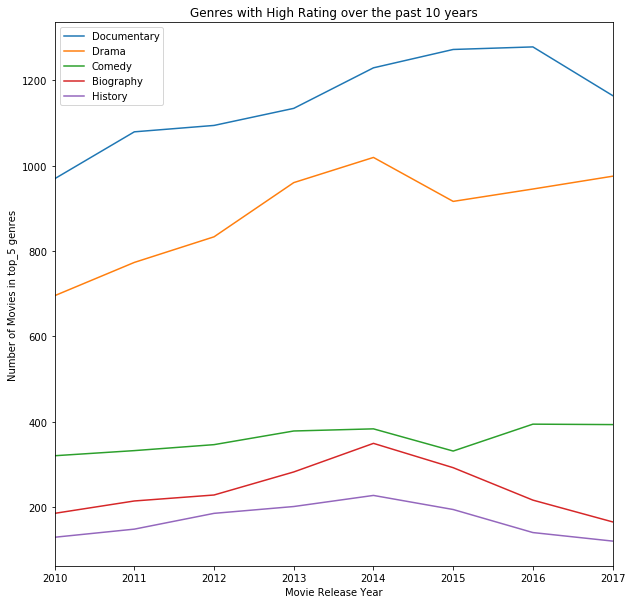

In [169]:
# Create Plot
ax=genre_year.plot(figsize=(10,10),title='Genres with High Rating over the past 10 years',legend=True)
# set title for x-axis
ax.set_xlabel("Movie Release Year")
# set title for y-axis
ax.set_ylabel("Number of Movies in top_5 genres")
# placing the legend to avoid overlap
plt.legend(loc="upper left")
plt.savefig("./images/genre_analysis.png")
plt.show()

#### Analysis on Movie Length

In [111]:
movie_df['runtime_minutes'].describe()

count    65125.000000
mean        94.740131
std        210.318722
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

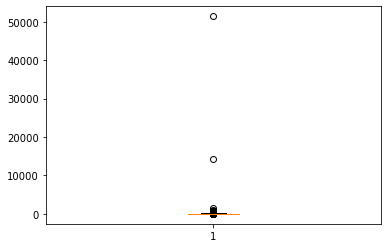

In [112]:
# runtime_minutes contains outliers so let us check using box plot
plt.boxplot(movie_df['runtime_minutes'])
plt.savefig("./images/boxplot.png")

Since runtime_minutes column contains outliers, I am categorizing into short,average and long movies based on run time and check the ratings for each category.

In [113]:
# This function takes in dataframe and returns the different length plots
def movie_runtime_plot(dataframe):
    # create subplot    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    #  setting title,x and y axis label for subplot 1   
    axes[0].set_title('Short Movie \n (40minutes-80 minutes)')
    axes[0].set_ylabel('Number of Movies')
    axes[0].set_xlabel('Lenght of the movie in minutes')
    
    #  setting title,x and y axis label for subplot 2    
    axes[1].set_title('Average Movie \n (80minutes-120 minutes)')
    axes[1].set_ylabel('Number of Movies')
    axes[1].set_xlabel('Lenght of the movie in minutes')
    
    #  setting title,x and y axis label for subplot 1  
    axes[2].set_title('Long Movie \n (120minutes-300minutes)')
    axes[2].set_ylabel('Number of Movies')
    axes[2].set_xlabel('Lenght of the movie in minutes')
    
    #  setting limits for short length movies   
    short_movie=dataframe['runtime_minutes'][(dataframe['runtime_minutes']>40)&(dataframe['runtime_minutes']<70)]
    #  setting limits for average length movies     
    average_movie=dataframe['runtime_minutes'][(dataframe['runtime_minutes']>70)&(dataframe['runtime_minutes']<120)]
    #  setting limits for long length movies 
    long_movie=dataframe['runtime_minutes'][(dataframe['runtime_minutes']>120)&(dataframe['runtime_minutes']<300)]
    
    axes[0].hist(short_movie,bins=30)
    axes[1].hist(average_movie,bins=30)
    axes[2].hist(long_movie,bins=30)
    fig.tight_layout(pad=3.0)
    plt.savefig("./images/runtime_length.png")
    return plt.show()

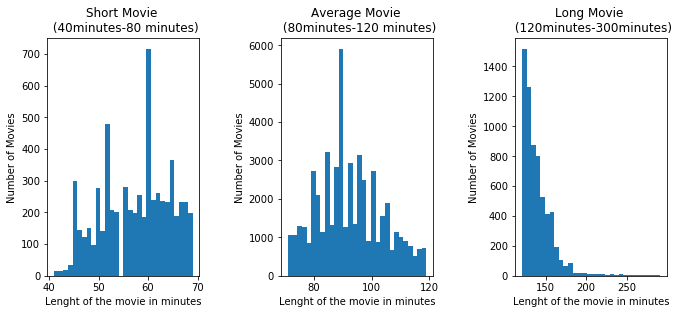

In [114]:
movie_runtime_plot(movie_df)

In [115]:
# filtering movie length between 40 to 300 and storing in new variable 'runtime_df'
runtime_df=movie_df[(movie_df['runtime_minutes']>40)&(movie_df['runtime_minutes']<300)]

In [116]:
# selecting column 'runtime_minutes','genres_x' and 'averagerating' and groupby 'averagerating'
runtime_df.iloc[:,3:6].groupby(by='averagerating')



In [117]:
# finding average runtime for particular rating and sort in Descending order.
runtime_df.iloc[:,3:6].groupby(by='averagerating').mean().sort_values(by='averagerating',ascending=False)

,runtime_minutes
averagerating,
10.0,77.833333
9.9,77.000000
9.8,74.727273
9.7,94.600000
9.6,83.200000
...,...
1.4,85.548387
1.3,89.391304
1.2,80.482759


In [118]:
# selecting the top 30 rating
top_30=runtime_df.iloc[:,3:6].groupby(by='averagerating').mean().sort_values(by='averagerating',ascending=False).head(30)


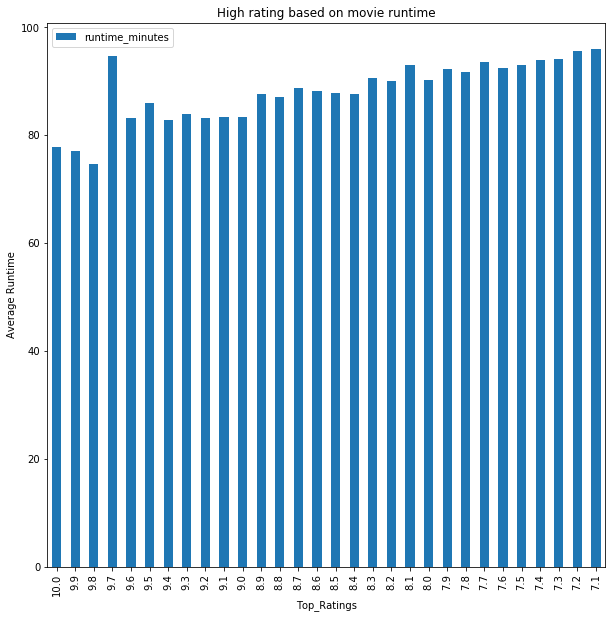

In [119]:
# Plot bar graph for the top 30 ratings.
ax=top_30.plot(kind='bar',figsize=(10,10),title='High rating based on movie runtime',legend=True)
# set title for x-axis
ax.set_xlabel("Top_Ratings")
# set title for y-axis
ax.set_ylabel("Average Runtime")
# placing the legend to avoid overlap
plt.legend(loc="upper left")
plt.savefig("./images/top_30.png")
plt.show()

In [120]:
least_30=runtime_df.iloc[:,3:6].groupby(by='averagerating').mean().sort_values(by='averagerating',ascending=True).head(30)

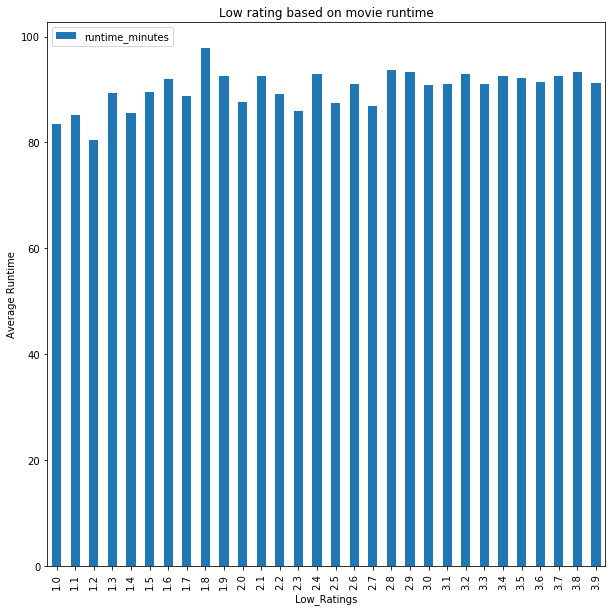

In [121]:
# Plot bar graph for the least 30 ratings.
ax=least_30.plot(kind='bar',figsize=(10,10),title='Low rating based on movie runtime',legend=True)
# set title for x-axis
ax.set_xlabel("Low_Ratings")
# set title for y-axis
ax.set_ylabel("Average Runtime")
# placing the legend to avoid overlap
plt.legend(loc="upper left")
plt.savefig("./images/least_30.png")
plt.show()

#### Studios with high Gross Analysis

In [122]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 65124
Data columns (total 37 columns):
tconst               65125 non-null object
movie                65125 non-null object
year                 65125 non-null int64
runtime_minutes      65125 non-null float64
genres_x             65125 non-null object
averagerating        65125 non-null float64
production_budget    1460 non-null float64
domestic_gross       1460 non-null float64
worldwide_gross      1460 non-null float64
month                1460 non-null float64
genres_y             65125 non-null object
Action               65125 non-null int64
Adult                65125 non-null int64
Adventure            65125 non-null int64
Animation            65125 non-null int64
Biography            65125 non-null int64
Comedy               65125 non-null int64
Crime                65125 non-null int64
Documentary          65125 non-null int64
Drama                65125 non-null int64
Family               65125 non-null int

In [123]:
gross_analysis_df=movie_df.dropna(subset=['domestic_gross'],axis=0)

In [124]:
gross_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 14 to 63892
Data columns (total 37 columns):
tconst               1460 non-null object
movie                1460 non-null object
year                 1460 non-null int64
runtime_minutes      1460 non-null float64
genres_x             1460 non-null object
averagerating        1460 non-null float64
production_budget    1460 non-null float64
domestic_gross       1460 non-null float64
worldwide_gross      1460 non-null float64
month                1460 non-null float64
genres_y             1460 non-null object
Action               1460 non-null int64
Adult                1460 non-null int64
Adventure            1460 non-null int64
Animation            1460 non-null int64
Biography            1460 non-null int64
Comedy               1460 non-null int64
Crime                1460 non-null int64
Documentary          1460 non-null int64
Drama                1460 non-null int64
Family               1460 non-null int64
Fantasy       

In [125]:
gross_analysis_df.head()

,tconst,movie,year,runtime_minutes,genres_x,averagerating,production_budget,domestic_gross,worldwide_gross,month,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
14,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,45000000.0,0.0,7.370600e+04,12.0,...,0,0,0,0,0,0,0,0,0,0
34,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,91000000.0,58236838.0,1.878612e+08,12.0,...,0,0,0,0,0,0,0,0,0,0
38,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,28000000.0,26017685.0,6.210859e+07,9.0,...,0,0,0,0,0,0,0,0,0,0
39,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,215000000.0,652270625.0,1.648855e+09,6.0,...,0,0,0,0,1,0,0,0,0,0
41,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,45000000.0,13109815.0,2.154473e+07,10.0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# gross_analysis_df.iloc[:,5:9].groupby('averagerating').mean().sort_values(by='averagerating',ascending=False).head(5).plot(kind='bar')

In [127]:
# gross_analysis_df.iloc[:,5:9].groupby('averagerating').mean().sort_values(by='averagerating',ascending=True).head(5).plot(kind='bar')

In [128]:
# gross_analysis_df[]
# gross_analysis_df['month']=gross_analysis_df['month'].astype(int)

In [129]:
# short_movie.iloc[:,3:6].groupby(by='averagerating').mean().sort_values(by='averagerating',ascending=True).head(30).plot(kind='bar',figsize=(10,8))

In [130]:
gross_analysis_df['domestic_gross'].isna().any()

False

In [131]:
gross_analysis_df['domestic_gross']

14               0.0
34        58236838.0
38        26017685.0
39       652270625.0
41        13109815.0
            ...     
61495            0.0
61851     28051045.0
62129            0.0
62992      6352306.0
63892     18107621.0
Name: domestic_gross, Length: 1460, dtype: float64

In [132]:
gross_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 14 to 63892
Data columns (total 37 columns):
tconst               1460 non-null object
movie                1460 non-null object
year                 1460 non-null int64
runtime_minutes      1460 non-null float64
genres_x             1460 non-null object
averagerating        1460 non-null float64
production_budget    1460 non-null float64
domestic_gross       1460 non-null float64
worldwide_gross      1460 non-null float64
month                1460 non-null float64
genres_y             1460 non-null object
Action               1460 non-null int64
Adult                1460 non-null int64
Adventure            1460 non-null int64
Animation            1460 non-null int64
Biography            1460 non-null int64
Comedy               1460 non-null int64
Crime                1460 non-null int64
Documentary          1460 non-null int64
Drama                1460 non-null int64
Family               1460 non-null int64
Fantasy       

In [133]:
gross_analysis_df['month'].isna().any()

False

In [134]:
# pip install sort-dataframeby-monthorweek
# pip install sorted-months-weekdays
# sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=movie_df,monthcolumnname='month')

# x=gross_analysis_df['month']
# y=gross_analysis_df['domestic_gross']
# plt.bar(x,y)
# set(gca,'XTick',1:36:360,'XTickLabel',Date)

In [135]:
# gross_analysis_df.iloc[:,7:10].groupby('month').mean().plot(kind='bar')
# gross_analysis_df=gross_analysis_df.iloc[:,7:10].groupby('month').mean()

In [136]:
# gross_analysis_df['month']

In [137]:
# gross_analysis_df['domestic_gross']

In [138]:
# gross_analysis_df=gross_analysis_df.iloc[:,7:10].groupby(by='month').mean()

In [139]:
# gross_analysis_df.plot(kind='bar')

In [140]:
# gross_analysis_df[['domestic_gross','month']]

In [141]:
gross_analysis_df['month'].nunique()

12

In [142]:
# x=gross_analysis_df['month']
# y=gross_analysis_df['worldwide_gross']
# plt.bar(x,y)

In [143]:
gross_analysis_df['month']=gross_analysis_df['month'].astype(int)

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
gross_analysis_df['month']

14       12
34       12
38        9
39        6
41       10
         ..
61495     7
61851     2
62129     8
62992     9
63892     3
Name: month, Length: 1460, dtype: int64

In [145]:
gross_analysis_df['domestic_gross'].describe()

count    1.460000e+03
mean     5.720939e+07
std      8.531097e+07
min      0.000000e+00
25%      3.413823e+06
50%      2.884546e+07
75%      6.925649e+07
max      7.000596e+08
Name: domestic_gross, dtype: float64

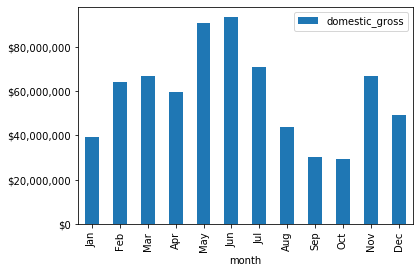

In [163]:
# gross_analysis_df.plot(kind='bar')
ax=gross_analysis_df[['domestic_gross','month']].groupby(by='month').mean().plot(kind='bar')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.savefig("./images/month_analysis.png")
plt.show()

## Conclusion:

This project gives us three valuable findings.
* Which genre to select for making a movie - As you can see that people have given high rating to 'Documentary'movies in the year 2010-2017. It gives us a clear picture that people like to watch Documentary movies compared to other genres.
* Does lenght of the movie have any impact in movie creation - From our analysis,most of the movies fall under the average runtime of 90 minutes but people have rated equally for any type of movie length which helps us in finding the movie run time has no impact in movie creation. 
* Which Studio have made high grossing film - From the top 5 Studios, BV studio have made high grossing movie.Hence in order to create a box office movie,chossing BV for making film would be the best option.  

## Next Step:

There are futher more analysis that can be made for creating a successful movie.
* Need to focus on the budget whether high budget leads to high people rating and profit.
* Need more analysis on the crew of which director and actor have given a successful movie in their career.
* when is the best time to make and release in order to make it successful.

## For More Information:


See the full analysis in the Jupyter Notebook or review this presentation.